In [ ]:
#Importing important librabies
import pandas as pd
import matplotlib.pyplot as plt
import sweetviz as sv
import seaborn as sns
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing, Holt


import matplotlib as mtl 
%matplotlib inline
!pip install sweetviz

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
air_quality = pd.read_excel("CO2.xlsx")   #importing the dataset

In [ ]:
air_quality.head()  

The dataset has one variable dependent w.r.t. time hence we call the dataset as 'Univariant dataset'.

## EDA (Exploratory Data Analysis)

In [ ]:
#Checking for Non-null values, datatypes of variables
air_quality.info()

In [ ]:
#Count of duplicated rows
air_quality[air_quality.duplicated()].shape

In [ ]:
#Data Structure 
air_quality.shape

In [ ]:
#data types
air_quality.dtypes

In [ ]:
#Parsing Year column as dates (for time series analysis time should be always in date_time dtype)
# then using it as index column fr further analysis

air_quality = pd.read_excel("CO2.xlsx",parse_dates=['Year'],index_col='Year')
air_quality

In [ ]:
# we can do convinient slicing for a specific time period

air_quality['1850-01-01':'1950-01-01']

In [ ]:
# we can check values corresponding to a specific time point
air_quality.loc['2008']

In [ ]:
#Descriptive stat

air_quality['CO2'].describe()

In [ ]:
sweet_report = sv.analyze(air_quality)
sweet_report.show_notebook(layout='widescreen' , w=880, h=700, scale=0.8)

## Outlier detection

In [ ]:
#Box plot
air_quality.boxplot(column=['CO2'],vert=False)

No Outlier has been detected

## Visualization 

In [ ]:
! pip install plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
air = pd.read_excel("CO2.xlsx")   #importing the dataset

In [ ]:
#plotting a line plot using plotly

fig = px.line(air, x=air.Year, y=[air['CO2']],
             labels={'Year': 'Year','value':'CO2 Emmision'})
fig.update_layout(title_text='CO2 emmision chart', font_size=15, font_color='black',legend_title_text='CO2 Parameters')
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)
fig.show()


## Inference

### Here we can see sudden increase in CO2 emission between 1840-1860 and 1950-1990
### Lets split the data and have a close look at these time periods

In [ ]:
#Splitting the data

df1 = air_quality['1840':'1860']
df2 = air_quality['1950':'1990']

In [ ]:
# Checking for time period of 1840-1860

ax1 = df1.plot()
ax1.set_ylabel('CO2 emission');

### Inference :
As here we see there is sudden rise in CO2 emission after 1845 that is because of the starting of Industrialization which was led by United Kingdom at that time period, with USA as second highest emitters in the world. 

In [ ]:
# Checking for time period of 1950':'1990

ax2 = df2.plot()
ax2.set_ylabel('CO2 emission');

### Inference :
Here we can see immense growth in CO2 emission after 1960. 
As the reason we found that there were some new developments after 1960. Along with America & Europe, Asian countries also started Industrializaing which caused this increased  emission.

In [ ]:
#plotting Heatmap  

ax = sns.heatmap(air_quality)

### Simple Moving Average

In [ ]:
#rolling average transform

rollingseries = air_quality.rolling(window = 10)

rollingmean = rollingseries.mean()    #finding rolling mean MA(5)


In [ ]:
air_quality.head(20)

In [ ]:
rollingmean.head(20)

In [ ]:
# plot transformed data
print("Graph with Moving Averages")
rollingmean.plot(color = 'red')
plt.show()


In [ ]:
print("Graph with Original Values")
air_quality.plot(color = 'blue')
plt.show()

### Simple Exponential Smoothing

In [ ]:
# exponential smoothing - single

fit1 = SimpleExpSmoothing(air_quality).fit(smoothing_level=0.2,optimized=False)

fit2 = SimpleExpSmoothing(air_quality).fit(smoothing_level=0.1,optimized=False)


In [ ]:
plt.figure(figsize=(18,8))
plt.plot(air_quality,  color = 'blue')         #a blue line will show original datapoints

plt.plot(fit1.fittedvalues, color = 'red')     #a red line will show smothened values with smoothing level of 0.2

plt.plot(fit2.fittedvalues, color = 'green')   #a green line will show smothened values with smoothing level of 0.10

### Holt's Method of Exponential Smoothing

In [ ]:
fit1 = Holt(air_quality).fit()    #Assuming linear trend

fit2 = Holt(air_quality, exponential=True).fit()    #Assuming exponential trend

In [ ]:
plt.plot(air_quality, color = 'blue')
plt.xticks(rotation=30)
 
plt.plot(fit1.fittedvalues, color = 'red')

plt.plot(fit2.fittedvalues, color = 'green')

### Comparison of Exponential and Holt's Methods of Forecasting

In [ ]:
fit1 = SimpleExpSmoothing(air_quality, initialization_method="estimated").fit()
fcast1 = fit1.forecast(30).rename("SES")

fit2 = Holt(air_quality, initialization_method="estimated").fit()
fcast2 = fit2.forecast(30).rename("Holt's")

fit3 = Holt(air_quality, exponential=True, initialization_method="estimated").fit()
fcast3 = fit3.forecast(30).rename("Exponential")

fit4 = Holt(air_quality, damped_trend=True, initialization_method="estimated").fit(damping_trend=0.98)
fcast4 = fit4.forecast(30).rename("Additive Damped")

fit5 = Holt(air_quality, exponential=True, damped_trend=True, initialization_method="estimated").fit()
fcast5 = fit5.forecast(30).rename("Multiplicative Damped")

ax = air_quality.plot(color="black", figsize=(18, 8))
air_quality.plot(ax=ax, color="black", legend=False)
fcast1.plot(ax=ax, color="red", legend=True)
fcast2.plot(ax=ax, color="green", legend=True)
fcast3.plot(ax=ax, color="blue", legend=True)
fcast4.plot(ax=ax, color="cyan", legend=True)
fcast5.plot(ax=ax, color="magenta", legend=True)
ax.set_ylabel("CO2 Emission")
plt.show()


In [ ]:
a = fcast1.mean()
b = fcast2.mean()
c = fcast3.mean()
d = fcast4.mean()
e = fcast5.mean()

In [ ]:
data = {"Smoothing Methods":pd.Series(["Simple Exponential","Holt's","Holt's Exponential","Holt's Additive Damped","Holt's Multiplicative Damped"]),"Average Emission(for next 30 yr)":pd.Series([a,b,c,d,e])}
table_smooth=pd.DataFrame(data)
table_smooth

### Seasoal decomposition and ADF Test

In [ ]:
#import seasonal decomposition package library from statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result = adfuller(air_quality['CO2'])

In [ ]:
# check for stationarity of data using dicky fuller test

# Ho : It is non-stationary (Null hypothesis)
# H1 : It is stationary  (Alternative hypothesis)

def adfuller_test(emission):
    result = adfuller(emission)
    labels =  ['ADF test statistic', 'p value', '#Lags used','No. of observations used']
    for value, label in zip(result,labels):
        print(label+':'+str(value))
    if result[1] <= 0.05 :
        print('Strong evidence against null hypothesis, data is stationary')
    else:
        print('Weak evidence against null hypothesis, data is non-stationary')
        

In [ ]:
adfuller_test(air_quality.CO2)

#### So here we can see the data is non-stationary, we have to make it stationary

In [ ]:
df_mul_decompose = seasonal_decompose(air_quality, period=50 )
df_mul_decompose.plot()
plt.show()

### Rolling Statistics Test

In [ ]:
rmean=air_quality.rolling(window=12).mean()
rstd=air_quality.rolling(window=12).std()
print(rmean,rstd)
orig=plt.plot(air_quality , color='black',label='Original')
mean= plt.plot(rmean , color='red',label='Rolling Mean')
std=plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')
plt.legend(loc='best')
plt.title("Rolling mean and standard deviation")
plt.show(block=False)

### Autocorrelation using ACF and PACF

In [ ]:
import numpy as np
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import rcParams
from cycler import cycler

In [ ]:
autocorrelation_plot(air_quality)
plt.show()

#### ACF

In [ ]:
# Calculate autocorrelation
acf_values = acf(air_quality['CO2'])

In [ ]:
# ACF values
np.round(acf_values,2)

In [ ]:
# Plot autocorrelation
plot_acf(air_quality['CO2'], lags=30);

We can see here ACF shows strong positive statistical significance correlation at upto 30 lags that doesn't decay to zero this suggests that the series is non-stationary.

#### PACF

In [ ]:
# Calculate partial autocorrelation
pacf_values = pacf(air_quality['CO2'])

In [ ]:
# PACF values
np.round(pacf_values,2)

In [ ]:
# Plot partial autocorrelation
plot_pacf(air_quality['CO2'], lags=30);

We can see 3-4 lags are exceeding the positive as well as negative threshold area while remaining lags are bounce around between being positive and negative inside the threshold

In [ ]:
air_quality.agg(['skew', 'kurtosis']).transpose()

In [ ]:
# air_quality.hist(grid=False,
#        figsize=(8, 4),
#        bins=30)

### Transformations

In [ ]:
import numpy as np
import pylab
import scipy.stats as stat

#### Normal/Gaussian Transformation

In [ ]:
def plot_data(air_quality,feature):
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    air_quality[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(air_quality[feature],dist='norm',plot=pylab)
    plt.show()
   

In [ ]:
plot_data(air_quality,'CO2')

In [ ]:
anorm = air_quality['CO2'].mean()

#### Square Root Transformation

In [ ]:
air_quality['CO2_square']=air_quality.CO2**(1/2)
plot_data(air_quality,'CO2_square')

In [ ]:
asquare = air_quality['CO2_square'].mean()

#### Log Transformation

In [ ]:
air_quality['CO2_log']=np.log(air_quality['CO2'])
plot_data(air_quality,'CO2_log')


In [ ]:
alog = air_quality['CO2_log'].mean()

#### Exponential Transformation

In [ ]:
air_quality['CO2_exponential']=air_quality.CO2**(1/1.2)
plot_data(air_quality,'CO2_exponential')


In [ ]:
aexp = air_quality['CO2_exponential'].mean()

### Box Cox Transformation

In [ ]:
air_quality['CO2_boxcox'],parameters=stat.boxcox(air_quality['CO2'])

In [ ]:
plot_data(air_quality,'CO2_boxcox')

In [ ]:
abox = air_quality['CO2_boxcox'].mean()

In [ ]:
data = {"Transformation":pd.Series(["Normal/Gaussian","Square Root","Logarithmic","Exponential","Box-Cox"]),"Average Transformed Value of CO2":pd.Series([anorm,asquare,alog,aexp,abox])}
table_transform=pd.DataFrame(data)
table_transform

# Model Building

### Splitting Data

In [ ]:
air_quality = pd.read_excel("CO2.xlsx")   #importing the dataset

In [ ]:
air_quality['CO2_square']=air_quality.CO2**(1/12)
air_quality


In [ ]:
Train = air_quality.head(150)
Test =  air_quality.tail(65)

### Evaluation Metric MAPE

In [ ]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Method

In [ ]:
ses_model = SimpleExpSmoothing(Train.CO2).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.CO2) 


### Holt method 

In [ ]:
# Holt method 
hw_model = Holt(Train["CO2"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.CO2) 

### Holts winter exponential smoothing with additive seasonality and additive trend

In [ ]:
hwe_model_add_add = ExponentialSmoothing(Train["CO2"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.CO2) 

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [ ]:
hwe_model_mul_add = ExponentialSmoothing(Train["CO2"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.CO2)

## MODEL BUILDING

In [ ]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('CO2~Year',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['Year'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['CO2'])-np.array(pred_linear))**2))
rmse_linear

In [ ]:
plt.plot(pred_linear)
plt.show()

In [ ]:
#Exponential Model

Exp = smf.ols('np.log(CO2)~Year',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['Year'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['CO2'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

In [ ]:
plt.plot(pred_Exp)
plt.show()

In [ ]:
#Quadratic 

Quad = smf.ols('Year~CO2+CO2_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["CO2","CO2_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Year'])-np.array(pred_Quad))**2))
rmse_Quad

In [ ]:
plt.plot(pred_Quad)
plt.show()

## Autoregression(AR)

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from random import random
from matplotlib import pyplot


In [ ]:
data=air_quality['CO2']
data

In [ ]:
data.plot()

In [ ]:
train=data[:len(data)-10]
test =data[len(data)-10:]

In [ ]:
model= AutoReg(train,lags=9).fit()

In [ ]:
print(model.summary())

In [ ]:
# # fit model
# model = AutoReg(data, lags=1)
# model_fit = model.fit()
# # make prediction
# yhat = model_fit.predict(len(data), len(data))
# print("value of yhat = ", yhat)

In [ ]:
pred=model.predict(start=len(train),end=len(data)-1,dynamic=False)

In [ ]:
pyplot.plot(pred)
pyplot.plot(test,color='red')


## Calculate Error

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_AR=sqrt(mean_squared_error(test,pred))
mse=mean_squared_error(test,pred)
print('RMSE value :',rmse_AR)
print('MSE value :', mse)

## Making Future Predication

In [ ]:
pred_future=model.predict(start=len(data)+1, end=len(data)+10,dynamic=False)
print("The Future prediction for the next 10 Year")
print(pred_future)
print('Number of prediction Made for Year : \t',len(pred_future))


In [ ]:
pred_future.plot()

## Moving Average(MA)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
train=data[:len(data)-10]
test =data[len(data)-10:]

In [ ]:
model= ARIMA(train,order=(0, 0, 1)).fit()

In [ ]:
print(model.summary())

In [ ]:
pred_ma=model.predict(start=len(train),end=len(data)-1,dynamic=False)

In [ ]:
pyplot.plot(pred)
pyplot.plot(test,color='red')
print(pred)

## Calculate Error

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_MA=sqrt(mean_squared_error(test,pred_ma))
print(rmse_MA)

## Making Future prediction

In [ ]:
pred_future_ma=model.predict(start=len(data)+1, end=len(data)+10,dynamic=False)
print("The Future prediction for the next 10 Year")
print(pred_future)
print('Number of prediction Made for Year : \t',len(pred_future_ma))

In [ ]:
pred_future.plot()

In [ ]:
# MA example
from statsmodels.tsa.arima.model import ARIMA
# fit model
model = ARIMA(data, order=(0, 0, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print("value of yhat = ", yhat)

## Autoregressive intergrated moving Average(ARIMA)¶

In [ ]:
import datetime as dt
import matplotlib.pyplot as plt

In [ ]:
data_str= air_quality.Year.astype(str)
data_str

In [ ]:
x = [dt.datetime.strptime(d,"%Y").date() for d in air_quality['Year'].astype(str)]
y = air_quality["CO2"]

plt.plot(x,y)
plt.show()

In [ ]:
data

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from pandas import DataFrame
 
def parser(x):
	return dt.datetime.strptime(x, "%Y")
 
data = pd.read_excel("CO2.xlsx", header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

#arimaM = ARIMA(data, order=(5,1,0))
arimaM = ARIMA(data, order=(1,1,0))

arimaMfit = arimaM.fit(disp=1)
print(arimaMfit.summary())
# plot residual errors
errors = DataFrame(arimaMfit.resid)
errors.plot()
pyplot.show()
errors.plot(kind='kde')
pyplot.show()
print(errors.describe())

In [ ]:
def parser(x):
	return dt.datetime.strptime(x, "%Y")
 
data = pd.read_excel("CO2.xlsx", header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
X = data.values
size = int(len(X) * 0.66)
limitCount = 50
train, test = X[0:size], X[size:size+limitCount]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,0))
	model_fit = model.fit(disp=(0))
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('pred=%f, exp=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Mean Squared Error: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


In [ ]:
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1,80)

In [ ]:
forecast

In [ ]:
rmse_ARIMA=sqrt(error)
print('RMSE value :',rmse_ARIMA)

## SEASONAL ARIMA

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pylab
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 8
import warnings
import itertools
warnings.filterwarnings("ignore")
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

In [ ]:
df = pd.read_excel("CO2.xlsx")
df.head()

In [ ]:
dateparse = lambda x: pd.to_datetime(x, format='%Y', errors = 'coerce')
df = pd.read_excel("CO2.xlsx", parse_dates=['Year'], index_col='Year', date_parser=dateparse) 
df.head()


In [ ]:
mte_exp_wighted_avg = df.ewm(span=2).mean()
plt.plot(df)
plt.plot(mte_exp_wighted_avg, color='red')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('Time (years)', fontsize = 25)
plt.ylabel('CO2 Emission (MMT)', fontsize = 25)
plt.title('CO2 emission', fontsize = 25)
plt.show()

## Exponentail weighted moving average

###### Another technique is to take the ‘weighted moving average’ where more recent values are given a higher weight. The popular method to assign the waights is using the exponential weighted moving average. Where weights are assigned to all previous values with a decay factor.

In [ ]:
def TestStationaryPlot(ts):
    rol_mean = ts.rolling(window = 12, center = False).mean()
    rol_std = ts.rolling(window = 12, center = False).std()
    
    plt.plot(ts, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    
    plt.xlabel('Time in Years', fontsize = 25)
    plt.ylabel('Total Emissions', fontsize = 25)
    plt.legend(loc='best', fontsize = 25)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 25)
    plt.show(block= True)

In [ ]:
mte_ewma_diff = df - mte_exp_wighted_avg
TestStationaryPlot(mte_ewma_diff)

In [ ]:
def TestStationaryAdfuller(ts, cutoff = 0.01):
    ts_test = adfuller(ts, autolag = 'AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)
    
    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [ ]:
TestStationaryAdfuller(mte_ewma_diff)

###### This time series has lesser variations in mean and standard deviation compared to the orginal ddataset. Also, the Test Statistic is smaller than the 5% and 10% critical value, which is better than the original case. There will be no missing values as all values from starting are given weights. So, it will work even with no previous values. In this case, we can say with 95% confidence level the series is a stationary series.

## Eliminating trend and seasonality: Differencing

###### One of the most common method of dealing with both trend and seasonality is differencing. In this technique, we take the difference of the original observation at a particular instant with that at the previous instant. This mostly works well to improve stationarity. First order differencing can be done as follows

In [ ]:
mte_first_difference = df - df.shift(1)  
TestStationaryPlot(mte_first_difference.dropna(inplace=False))

In [ ]:
TestStationaryAdfuller(mte_first_difference.dropna(inplace=False))

The first difference improves the stationarity of the series significantly. Let us use also the seasonal difference to remove the seasonality of the data and see how that impacts stationarity of the data.

In [ ]:
mte_seasonal_difference = df - df.shift(12)  
TestStationaryPlot(mte_seasonal_difference.dropna(inplace=False))
TestStationaryAdfuller(mte_seasonal_difference.dropna(inplace=False))

In [ ]:
mte_seasonal_first_difference = mte_first_difference - mte_first_difference.shift(12)  
TestStationaryPlot(mte_seasonal_first_difference.dropna(inplace=False))

In [ ]:
TestStationaryAdfuller(mte_seasonal_first_difference.dropna(inplace=False))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

## Find optimal parameters and build SARIMA model

When looking to fit time series dataset with seasonal ARIMA model, our first goal is to find the values of SARIMA(p,d,q)(P,D,Q)s that optimize our metric of interest. Before moving directly how to find the optimal values of the parameters let us see the two situations in stationarities: A strictly stationary series with no dependence among the values. This is the easy case wherein we can model the residuals as white noise. The second case being a series with significant dependence among values and needs statistical models like ARIMA to forecast future oucomes.

Auto-Regressive Integrated Moving Average (ARIMA): The ARIMA forecasting for a stationary time series is a linear funcion similar to linear regression. The predictors mainly depend on the parameters (p,d,q) of the ARIMA model:

Number of Auto-Regressive (AR) terms (p): AR terms are just lags of dependent variable. For instance if p is 4, the predictors for x(t) will depend on x(t-1)….x(t-4). This term allows us to incorporate the effect of past values into our model. This would be similar to stating that the weather is likely to be warm tomorrow if it has been warm the past 4 days. Number of Moving Average(MA) terms (q): MA terms are lagged forecast errors in prediction function. This term allows us to set the error of our model as a linear combination of the error values observed at previous time points in the past. For instance if q is 4, the predictors for x(t) will be e(t-1)….e(t-4) where e(i) is the difference between the moving average at ith instant and actual value. Number of Differences (d): These are the number of nonseasonal differences, i.e., if we took the first order difference. So either we can pass the first order difference variable and put d=0 or pass the original observed variable and put d=1. Both will generate same results. This term explains the number of past time points to subtract from the current value. This would be similar to stating that it is likely to be same temperature tomorrow if the difference in temperature in the last three days has been very small.

## Plot the ACF and PACF charts and find the optimal parameters

Autocorrelation Function (ACF): It is a measure of the correlation between the the time series (ts) with a lagged version of itself. For instance at lag 4, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-4’…’t2-4’ (t1-4 and t2 being end points of the range). Partial Autocorrelation Function (PACF): This measures the correlation between the ts with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 4, it will check the correlation but remove the effects already explained by lags 1 to 3. Therefore, the next step will be determing the tuning parameters (p and q) of the model by looking at the autocorrelation and partial autocorrelation graphs. The chart below provides a brief guide on how to read the autocorrelation and partial autocorrelation graphs inorder to select the parameters.

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(mte_seasonal_first_difference.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(mte_seasonal_first_difference.iloc[13:], lags=40, ax=ax2)

In [ ]:
p = d = q = range(0, 2) # Define the p, d and q parameters to take any value between 0 and 2
pdq = list(itertools.product(p, d, q)) # Generate all different combinations of p, q and q triplets
pdq_x_QDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] # Generate all different combinations of seasonal p, q and q triplets
print('Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], pdq_x_QDQs[1]))
print('SARIMAX: {} x {}'.format(pdq[2], pdq_x_QDQs[2]))

In [ ]:
for param in pdq:
    for seasonal_param in pdq_x_QDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(df,
                                            order=param,
                                            seasonal_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [ ]:
mod = sm.tsa.statespace.SARIMAX(train, 
                                order=(1,1,1), 
                                seasonal_order=(0,1,1,12),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

In [ ]:
results

In [ ]:
import matplotlib.pyplot as plt
plt.plot(results.resid)
plt.show()

In [ ]:
dataframe = pd.DataFrame(results.resid, columns= ['values'])
dataframe

In [ ]:
print(dataframe.describe())

In [ ]:
dataframe.plot(kind='kde')


In [ ]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

## Validating prediction

In [ ]:
results

In [ ]:
pred = results.get_prediction(start=len(data)+1, end=len(data)+10, dynamic=False)
pred_ci = pred.conf_int()
pred_ci

The dynamic=False argument ensures that we produce one-step ahead forecasts, meaning that forecasts at each point are generated using the full history up to that point.

We can plot the real and forecasted values of the CO2 emission time series to assess how well the model fits.

In [ ]:
ax = df['2001':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='r', alpha=.5)

ax.set_xlabel('Time (years)')
ax.set_ylabel('NG CO2 Emissions')
plt.legend()

# plt.show()

In [ ]:
from pandas import Series
from numpy.random import randn

In [ ]:
mte_forecast = pred.predicted_mean
mte_truth = df['2005-01-01':]

ctn=mte_truth.to_numpy(dtype ='float32')

# Compute the mean square error
mse = ((mte_forecast - ctn)**2 ).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
#print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'.format(np.sqrt(sum((mte_forecast-ctn)**2)/len(mte_forecast))))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'.format(np.sqrt((mte_forecast - ctn)**2 ).mean()))

In [ ]:
rmse_SARIMA = 1.1230

## Super vector regression - SVR

In [ ]:
import pandas as pd
import numpy as np
import math
import datetime as dt
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler
!
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU

from itertools import cycle

# ! pip install plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


In [ ]:
air= air_quality[['Year','CO2']]
print("Shape of close dataframe:", air.shape)

In [ ]:
air

In [ ]:
del air['Year']
scaler=MinMaxScaler(feature_range=(0,1))
air=scaler.fit_transform(np.array(air).reshape(-1,1))
print(air.shape)
air

In [ ]:
training_size=int(len(air)*0.85)
test_size=len(air)-training_size
train_data,test_data=air[0:training_size,:],air[training_size:len(air),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

In [ ]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

In [ ]:
from sklearn.svm import SVR

svr_rbf =SVR(kernel='rbf', degree=3, gamma='scale', 
              coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, 
              shrinking=True, cache_size=200, verbose=False, max_iter=- 1)
svr_rbf.fit(X_train, y_train)

In [ ]:
train_predict=svr_rbf.predict(X_train)
test_predict=svr_rbf.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

### Evaluation metrices RMSE, MSE and MAE

Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [ ]:
rmse_svr = math.sqrt(mean_squared_error(original_ytest,test_predict))
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

### Explained variance regression score

The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [ ]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

### R2 score for regression

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best 0 or < 0 = worse

In [ ]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

### Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)

In [ ]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

In [ ]:
test_predict

In [ ]:
air_data=air_quality[['Year','CO2']]
air_data

In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(air)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(air)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(air)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)





plotdf = pd.DataFrame({'Year': air_data['Year'],
                       'original_CO2': air_data['CO2'],
                      'train_predicted_CO2': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_CO2': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Year'], y=[plotdf['original_CO2'],plotdf['train_predicted_CO2'],
                                          plotdf['test_predicted_CO2']],
              labels={'value':'co2','year': 'Year'})
fig.update_layout(title_text='Comparision between original co2 Level vs predicted co2 level',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')


fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
plotdf = pd.DataFrame({'Year': air_data['Year'],
                       'original_CO2': air_data['CO2'],
                      'train_predicted_CO2': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_CO2': testPredictPlot.reshape(1,-1)[0].tolist()})
plotdf.tail(50)

## LSTM Network for Regression

The unit is called a long short-term memory block because the program is using a structure founded on short-term memory processes to create longer-term memory.... In general, LSTM is an accepted and common concept in pioneering recurrent neural networks.

We can write a simple function to convert our single column of data into a two-column dataset: the first column containing this month’s (t) passenger count and the second column containing next month’s (t+1) passenger count, to be predicted.

In [ ]:
train_size = int(len(air) * 0.67)
test_size = len(air) - train_size
train, test = air[0:train_size,:], air[train_size:len(air),:]
print(len(train), len(test))

In [ ]:
training_size=int(len(air)*0.67)
test_size=len(air)-training_size
train_data,test_data=air[0:training_size,:],air[training_size:len(air),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)


In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

In [ ]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=5,verbose=1)

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

In [ ]:

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

### Evaluation metrices RMSE, MSE and MAE

Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data

In [448]:
lstm_rmse = math.sqrt(mean_squared_error(original_ytrain,train_predict))
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  1.30761414060647
Train data MSE:  1.7098547407139972
Test data MAE:  1.1417736251759627
-------------------------------------------------------------------------------------
Test data RMSE:  1.4787544602602427
Test data MSE:  2.1867147537395617
Test data MAE:  1.3726134670535506


### Explained variance regression score

The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors

In [449]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.953739607796777
Test data explained variance regression score: 0.5690105948605151


### R2 score for regression

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best
0 or < 0 = worse#

In [450]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9433005300620324
Test data R2 score: -2.114026627726093


Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)

In [453]:
look_back=time_step
trainPredictPlot = np.empty_like(air)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(air)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(air)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)



plotdf = pd.DataFrame({'Year': air_data['Year'],
                       'original_CO2': air_data['CO2'],
                      'train_predicted_CO2': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_CO2': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Year'], y=[plotdf['original_CO2'],plotdf['train_predicted_CO2'],
                                          plotdf['test_predicted_CO2']],
              labels={'value':'co2','year': 'Year'})
fig.update_layout(title_text='Comparision between original co2 Level vs predicted co2 level',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')


fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (215, 1)
Test predicted data:  (215, 1)


In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next years: ", len(lst_output))

In [457]:
x_input
temp_input
temp_input

[0.9560397290948306,
 0.9340595936422459,
 0.9120794581896613,
 0.9615347629579768,
 0.9505446952316845,
 0.9505446952316845,
 0.9175744920528073,
 0.9230695259159536,
 0.9230695259159536,
 0.8736142211476379,
 0.8571291195581994,
 0.8571291195581994,
 0.81316884865303,
 0.8076738147898836,
 0.8296539502424685]

In [458]:
last_days=np.arange(1,time_step*1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[16 17 18 19 20 21 22 23 24 25]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(air[len(air)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycler(['Last 15 days close price','Predicted next 10 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------

# Compare the results

In [460]:
data = {"MODEL":pd.Series(["rmse_SARIMA","rmse_SVR", "rmse_linear","rmse_Exp","rmse_Quad","rmse_AR","rmse_MA","rmse_ARIMA","rmse_LSTM"]),"RMSE_Values":pd.Series([rmse_SARIMA,rmse_svr,rmse_linear,rmse_Exp,rmse_Quad,rmse_AR,rmse_MA,rmse_ARIMA,lstm_rmse])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
7,rmse_ARIMA,0.622874
0,rmse_SARIMA,1.123000
8,rmse_LSTM,1.307614
1,rmse_SVR,1.478754
5,rmse_AR,2.094495
2,rmse_linear,3.646347
6,rmse_MA,9.201726
4,rmse_Quad,34.830881
3,rmse_Exp,1819.210162


# Deployment

In [461]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime
import itertools

import warnings
from math import sqrt
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
from pandas.tseries.offsets import DateOffset
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages


In [463]:
import pandas as pd 
from datetime import datetime


def dateparse(dates):
    return datetime.strptime(dates, '%Y')


data = pd.read_excel("CO2.xlsx",
                           parse_dates=['Year'],
                           index_col='Year',
                           date_parser=dateparse)

##  Creating new dataframe with user input

In [464]:
df = 12

In [465]:
future_dates=[data.index[-1]+ DateOffset(years=x)for x in range(0,df)]

In [466]:
future_data=pd.DataFrame(index=future_dates[1:],columns=data.columns)

## Model building with arima

In [467]:
final_arima = ARIMA(data['CO2'],order = (3,1,4))
final_arima = final_arima.fit()

In [468]:
final_arima.fittedvalues.tail()

Year
2010-01-01    15.748893
2011-01-01    15.438530
2012-01-01    15.305237
2013-01-01    14.562158
2014-01-01    14.552655
dtype: float64

In [469]:
future_data['CO2'] = final_arima.predict(start = 215, end = 225, dynamic= True)  
#future_df[['CO2', 'forecast']].plot(figsize=(12, 8))
#plt.title('Forecast for next 5 years')

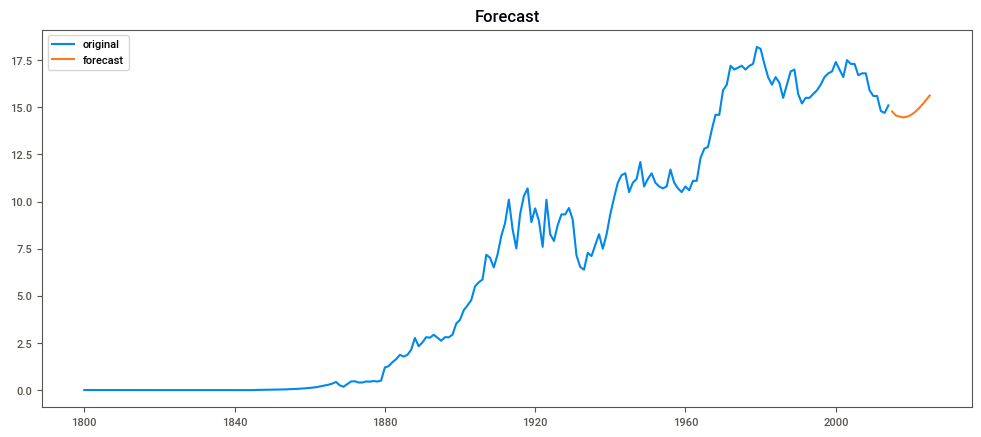

In [470]:

plt.figure(figsize=(12,5), dpi=100)
plt.plot(data, label='original')
#plt.plot(test, label='actual')
plt.plot(future_data['CO2'], label='forecast')
plt.title('Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
future_data.tail(df)